In [1]:
%matplotlib inline
from google.colab import drive
from google.colab import files

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import cv2
import os

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets as dset
from torch.utils.data import DataLoader

In [2]:
# Mounting your Google Drive to Google Colab

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Changing to the drive root directory

%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [4]:
# Extracting files from the dataset

!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/0.jpg              
  inflating: data/1.jpg              
  inflating: data/10.jpg             
  inflating: data/100.jpg            
  inflating: data/101.jpg            
  inflating: data/102.jpg            
  inflating: data/103.jpg            
  inflating: data/104.jpg            
  inflating: data/105.jpg            
  inflating: data/106.jpg            
  inflating: data/107.jpg            
  inflating: data/108.jpg            
  inflating: data/109.jpg            
  inflating: data/11.jpg             
  inflating: data/110.jpg            
  inflating: data/111.jpg            
  inflating: data/112.jpg            
  inflating: data/113.jpg            
  inflating: data/114.jpg            
  inflating: data/115.jpg            
  inflating: data/116.jpg            
  inflating: data/117.jpg            
  inflating: data/118.jpg            
  inflating: data/119.jpg            
  inflating: data/12.jpg             
  inflating:

In [5]:
# Assigning the filepath to a variable

data_path = "/content/drive/My Drive/data/"

In [6]:
# Get the names of all files.

def get_filenames(path):
  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

file_names = get_filenames(data_path)
file_names[:5]

['/content/drive/My Drive/data/0.jpg',
 '/content/drive/My Drive/data/1.jpg',
 '/content/drive/My Drive/data/10.jpg',
 '/content/drive/My Drive/data/100.jpg',
 '/content/drive/My Drive/data/101.jpg']

In [7]:
# Histogram Equalization with Opencv [2]

def equalize_hist(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return cv2.equalizeHist(gray)
 
# Apply Histogram Equalization to all data
for infile in file_names:
    # Load each image as grayscale
    img = cv2.imread(infile)
  
    if (len(img.shape)==3):
      outfile = equalize_hist(img)
      cv2.imwrite(infile, outfile)
    else:
      print('No rgb')

In [8]:
# Data Loader and transformations

def loader(data_dir, img_size, batchSize):

  # Preprocessing: Resize, normalization, brightness corrections
  dataset = dset.ImageFolder(root = data_dir,
                            transform=transforms.Compose([
                            transforms.Resize(img_size),
                            transforms.ColorJitter(brightness=(0.5, 1.5)),
                            transforms.ToTensor(),
                            ]))
  
  # Loader
  dataloader = torch.utils.data.DataLoader(dataset,
                                          batch_size= batchSize,
                                          shuffle=True)
  
  print('Data size:', len(dataset), 'images')
  return dataloader

In [9]:
# Sampling with BatchSize

data_path = '.'
sample_loader = loader(data_path, 24, 3)  # not a good size tho
print('Sample size:', len(sample_loader), 'images')

Data size: 436 images
Sample size: 146 images


In [10]:
# Subset of data

sample_iter = iter(sample_loader)
sample, labels  = sample_iter.next()

print('Sample and images shape on BatchSize = {}'.format(sample.size()))

Sample and images shape on BatchSize = torch.Size([3, 3, 33, 24])


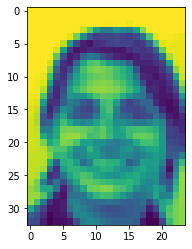

In [11]:
# RGB visualization

for i in range(0,1):
  img = sample[i]
  im = img.permute(1,2,0)[:,:,0] #blue=0, green=1, red=2
  plt.imshow(im)
  plt.show()

(-0.5, 79.5, 36.5, -0.5)

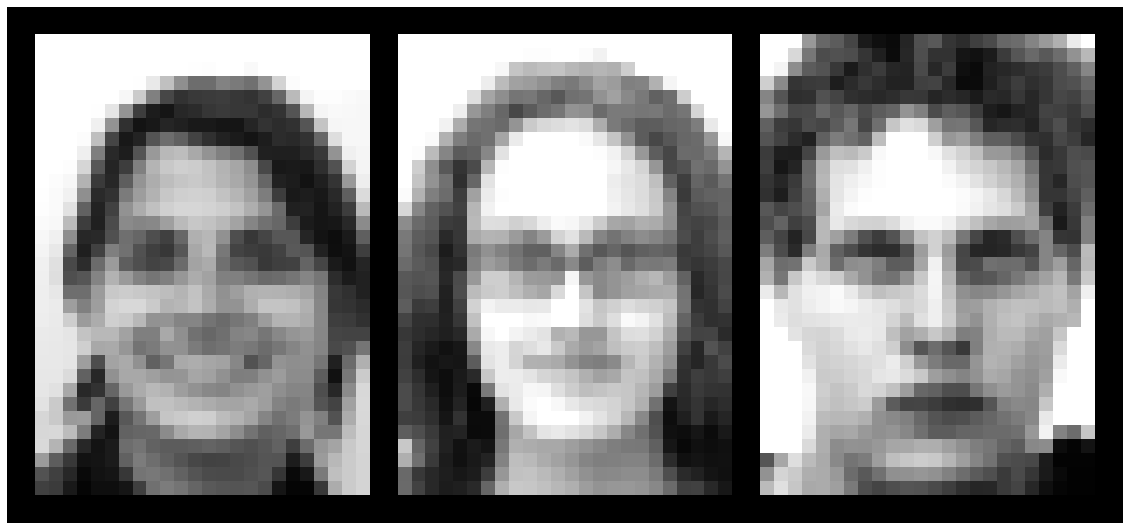

In [12]:
# Making a grid of Tensors(batchsize, channels, height, width) as arg [3]

grid_sample = torchvision.utils.make_grid(sample)
plt.figure(figsize = (20,10))
plt.imshow(grid_sample.numpy().transpose((1, 2, 0)))
plt.axis('off')

In [13]:
# Checking out directory

%cd /content/drive/My Drive/data/

/content/drive/My Drive/data


In [14]:
# Compressing folder of images after processing

!zip -r /content/drive/My\ Drive/results.zip /content/drive/My\ Drive/data

  adding: content/drive/My Drive/data/ (stored 0%)
  adding: content/drive/My Drive/data/0.jpg (deflated 1%)
  adding: content/drive/My Drive/data/1.jpg (deflated 1%)
  adding: content/drive/My Drive/data/10.jpg (deflated 0%)
  adding: content/drive/My Drive/data/100.jpg (deflated 0%)
  adding: content/drive/My Drive/data/101.jpg (deflated 0%)
  adding: content/drive/My Drive/data/102.jpg (deflated 0%)
  adding: content/drive/My Drive/data/103.jpg (deflated 0%)
  adding: content/drive/My Drive/data/104.jpg (deflated 0%)
  adding: content/drive/My Drive/data/105.jpg (deflated 0%)
  adding: content/drive/My Drive/data/106.jpg (deflated 0%)
  adding: content/drive/My Drive/data/107.jpg (deflated 0%)
  adding: content/drive/My Drive/data/108.jpg (deflated 0%)
  adding: content/drive/My Drive/data/109.jpg (deflated 0%)
  adding: content/drive/My Drive/data/11.jpg (deflated 0%)
  adding: content/drive/My Drive/data/110.jpg (deflated 0%)
  adding: content/drive/My Drive/data/111.jpg (deflated

In [15]:
# Download results to your computer

files.download("/content/drive/My Drive/results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**References**

[1] [Basic Image Handling and Processing](https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html)

[2] [OpenCV Python equalizeHist colored image](https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image)

[3] [PyTorch Dataset and DataLoader](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)